In [1]:
# import the libraries
!pip install tensorflow
import pandas as pd
import matplotlib.pyplot as plt
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries


In [3]:
# store the Api key
key=open('APi_key.txt').read()

In [4]:
# create thr time series object and callthe api
ts=TimeSeries(key,output_format='pandas')
data,meta_data=ts.get_intraday('TSLA',interval='1min',outputsize='full')

In [5]:
#examine the date
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2024-08-19 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [6]:
data.shape



(20160, 5)

In [7]:
data.head()


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-19 19:59:00,222.12,222.120,222.00,222.00,5153.0
2024-08-19 19:58:00,222.10,222.122,222.09,222.11,2116.0
2024-08-19 19:57:00,222.14,222.140,222.09,222.10,1954.0
2024-08-19 19:56:00,222.18,222.180,222.08,222.10,417.0
2024-08-19 19:55:00,222.12,222.190,222.00,222.08,9334.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20160 entries, 2024-08-19 19:59:00 to 2024-07-22 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20160 non-null  float64
 1   2. high    20160 non-null  float64
 2   3. low     20160 non-null  float64
 3   4. close   20160 non-null  float64
 4   5. volume  20160 non-null  float64
dtypes: float64(5)
memory usage: 945.0 KB


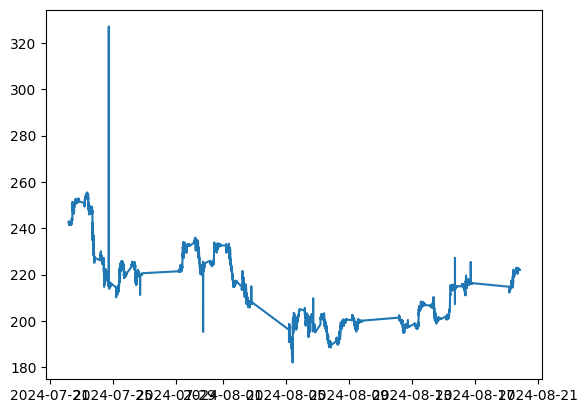

In [9]:
plt.plot(data['4. close'])

In [10]:
#rename coloumns and add seperate colomn for date and time
columns=['open','high','low','close','volume']
data.columns=columns

In [11]:
data['TradeData'] = data.index.date
data['Time'] = data.index.time
data.head()

,open,high,low,close,volume,TradeData,Time
date,,,,,,,
2024-08-19 19:59:00,222.12,222.120,222.00,222.00,5153.0,2024-08-19,19:59:00
2024-08-19 19:58:00,222.10,222.122,222.09,222.11,2116.0,2024-08-19,19:58:00
2024-08-19 19:57:00,222.14,222.140,222.09,222.10,1954.0,2024-08-19,19:57:00
2024-08-19 19:56:00,222.18,222.180,222.08,222.10,417.0,2024-08-19,19:56:00
2024-08-19 19:55:00,222.12,222.190,222.00,222.08,9334.0,2024-08-19,19:55:00


In [12]:
data.loc['2024-08-16']

,open,high,low,close,volume,TradeData,Time
date,,,,,,,
2024-08-16 19:59:00,216.31,216.35,216.310,216.324,4403.0,2024-08-16,19:59:00
2024-08-16 19:58:00,216.37,216.38,216.310,216.330,2005.0,2024-08-16,19:58:00
2024-08-16 19:57:00,216.33,216.38,216.290,216.380,2797.0,2024-08-16,19:57:00
2024-08-16 19:56:00,216.30,216.32,216.270,216.320,2326.0,2024-08-16,19:56:00
2024-08-16 19:55:00,216.30,216.31,216.295,216.300,1937.0,2024-08-16,19:55:00
...,...,...,...,...,...,...,...
2024-08-16 04:04:00,215.40,215.66,215.400,215.660,8889.0,2024-08-16,04:04:00
2024-08-16 04:03:00,215.04,215.47,215.000,215.400,8278.0,2024-08-16,04:03:00
2024-08-16 04:02:00,214.94,215.18,214.920,215.000,4639.0,2024-08-16,04:02:00


In [13]:
market=data.between_time('00:00','23:59').copy()
market.sort_index(inplace=True)
market.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20160 entries, 2024-07-22 04:00:00 to 2024-08-19 19:59:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       20160 non-null  float64
 1   high       20160 non-null  float64
 2   low        20160 non-null  float64
 3   close      20160 non-null  float64
 4   volume     20160 non-null  float64
 5   TradeData  20160 non-null  object 
 6   Time       20160 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.2+ MB


In [14]:
market.groupby('TradeData').agg({'low':min,'high':max})

C:\Users\PMLS\AppData\Local\Temp\ipykernel_6820\2723673570.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  market.groupby('TradeData').agg({'low':min,'high':max})
C:\Users\PMLS\AppData\Local\Temp\ipykernel_6820\2723673570.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  market.groupby('TradeData').agg({'low':min,'high':max})


,low,high
TradeData,,
2024-07-22,237.930,262.934
2024-07-23,171.782,255.759
2024-07-24,180.430,387.944
2024-07-25,206.298,264.220
2024-07-26,210.313,239.160
2024-07-29,216.060,248.954
2024-07-30,169.978,318.203
2024-07-31,220.845,249.380
2024-08-01,214.300,233.720


In [15]:
market.loc[market.groupby('TradeData')['low'].idxmin()]

,open,high,low,close,volume,TradeData,Time
date,,,,,,,
2024-07-22 08:41:00,244.020,248.385,237.930,244.220,18474.0,2024-07-22,08:41:00
2024-07-23 16:56:00,239.350,254.155,171.782,239.250,42893.0,2024-07-23,16:56:00
2024-07-24 16:58:00,215.200,365.268,180.430,215.170,43463.0,2024-07-24,16:58:00
2024-07-25 16:47:00,219.090,219.090,206.298,219.090,13065.0,2024-07-25,16:47:00
2024-07-26 16:51:00,219.970,220.000,210.313,211.232,5661.0,2024-07-26,16:51:00
2024-07-29 08:56:00,223.420,223.500,216.060,223.430,5535.0,2024-07-29,08:56:00
2024-07-30 16:54:00,221.690,301.638,169.978,221.550,12042.0,2024-07-30,16:54:00
2024-07-31 08:45:00,225.190,229.540,220.845,225.120,5723.0,2024-07-31,08:45:00
2024-08-01 16:26:00,215.000,215.000,214.300,214.660,25256.0,2024-08-01,16:26:00


In [16]:
market['close']

date
2024-07-22 04:00:00    242.32
2024-07-22 04:01:00    242.38
2024-07-22 04:02:00    242.92
2024-07-22 04:03:00    242.88
2024-07-22 04:04:00    242.50
                        ...  
2024-08-19 19:55:00    222.08
2024-08-19 19:56:00    222.10
2024-08-19 19:57:00    222.10
2024-08-19 19:58:00    222.11
2024-08-19 19:59:00    222.00
Name: close, Length: 20160, dtype: float64

In [17]:
# get the close column only
df1=market.reset_index()['close']
df1.head()


0    242.32
1    242.38
2    242.92
3    242.88
4    242.50
Name: close, dtype: float64

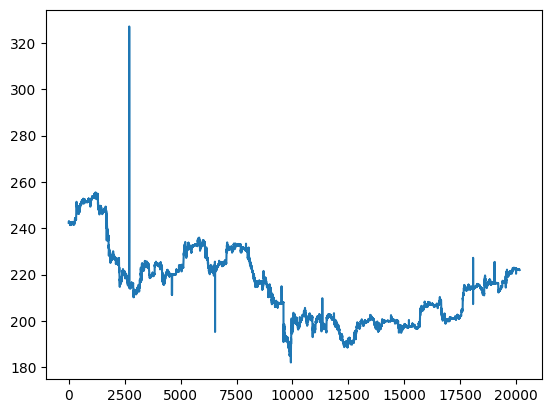

In [18]:
df1.shape
plt.plot(df1)


In [19]:
df1

0        242.32
1        242.38
2        242.92
3        242.88
4        242.50
          ...  
20155    222.08
20156    222.10
20157    222.10
20158    222.11
20159    222.00
Name: close, Length: 20160, dtype: float64

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [21]:
df1.shape


(20160, 1)

In [22]:
df1

array([[0.41536753],
       [0.41578141],
       [0.41950637],
       ...,
       [0.27588847],
       [0.27595745],
       [0.27519866]])

In [23]:
#splitting the data into train-test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(13104, 7056)

In [25]:
# convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)


In [26]:
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train, Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [27]:
print(X_train)

[[0.41536753 0.41578141 0.41950637 ... 0.4108148  0.41136665 0.41088378]
 [0.41578141 0.41950637 0.41923045 ... 0.41136665 0.41088378 0.41122868]
 [0.41950637 0.41923045 0.41660918 ... 0.41088378 0.41122868 0.41095276]
 ...
 [0.10143618 0.1013672  0.10053943 ... 0.12764886 0.12668313 0.12766955]
 [0.1013672  0.10053943 0.10125683 ... 0.12668313 0.12766955 0.127166  ]
 [0.10053943 0.10125683 0.10274681 ... 0.12766955 0.127166   0.12771784]]


In [28]:
print(X_train.shape),print(Y_train.shape)

(13003, 100)
(13003,)


(None, None)

In [29]:
print(X_test.shape),print(Y_test.shape)

(6955, 100)
(6955,)


(None, None)

In [30]:
 # reshape input to be [samples, time steps, features] is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
# create the LSTM model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\PMLS\anaconda3\envs\flak_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
X_train[:100]

array([[[0.41536753],
        [0.41578141],
        [0.41950637],
        ...,
        [0.4108148 ],
        [0.41136665],
        [0.41088378]],

       [[0.41578141],
        [0.41950637],
        [0.41923045],
        ...,
        [0.41136665],
        [0.41088378],
        [0.41122868]],

       [[0.41950637],
        [0.41923045],
        [0.41660918],
        ...,
        [0.41088378],
        [0.41122868],
        [0.41095276]],

       ...,

       [[0.4108148 ],
        [0.41136665],
        [0.41088378],
        ...,
        [0.4104699 ],
        [0.41157359],
        [0.41178053]],

       [[0.41136665],
        [0.41088378],
        [0.41122868],
        ...,
        [0.41157359],
        [0.41178053],
        [0.41157359]],

       [[0.41088378],
        [0.41122868],
        [0.41095276],
        ...,
        [0.41178053],
        [0.41157359],
        [0.41191849]]])

In [35]:
hist=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - loss: 0.0080 - val_loss: 1.9499e-05
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step - loss: 6.9767e-05 - val_loss: 1.8289e-05
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 138ms/step - loss: 1.3591e-04 - val_loss: 1.8679e-05
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 48s 234ms/step - loss: 9.6070e-05 - val_loss: 2.2042e-05
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - loss: 1.5981e-04 - val_loss: 1.6671e-05
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 29s 140ms/step - loss: 6.1821e-05 - val_loss: 1.7687e-05
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 38s 185ms/step - loss: 6.6178e-05 - val_loss: 1.7995e-05
Epoch 8/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - loss: 5.7654e-05 - val_loss: 1.4812e-05
Epoch 9/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 31s 149ms/step - loss: 1.0250e-04 - val_loss: 3.0626e-05
Epoch 10/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 29s 141ms/step - loss: 1.3353e-04 - val_loss: 2.2195e-05
Epoch 11/30
204/204 ━━━━━━━━━━━━━

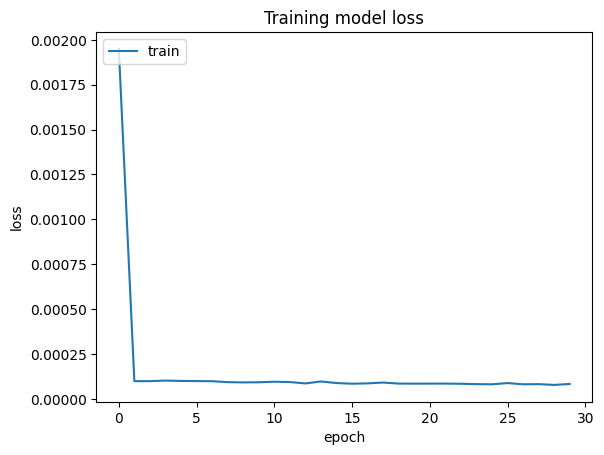

In [37]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [38]:
tf.__version__

'2.17.0'

In [39]:
#lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


In [40]:
#Transformback to origin form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [41]:
# claculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

219.76115941986143

In [42]:
# test data RMSe
math.sqrt(mean_squared_error(Y_test,test_predict))

206.8182924883023

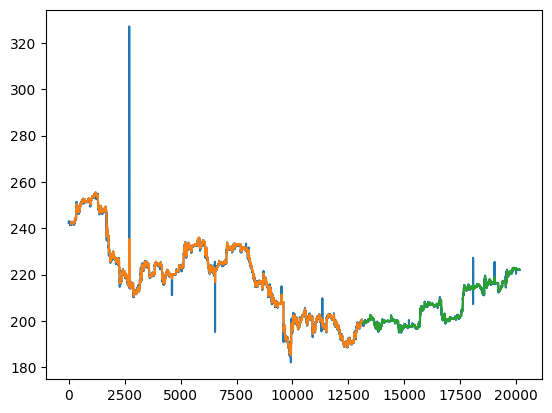

In [43]:
#plotting
#shift treain predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [44]:
len(test_data)

7056

In [45]:
X_input=test_data[2911:].reshape(1,-1)
X_input.shape

(1, 4145)

In [46]:
X_input.shape

(1, 4145)

In [47]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input


[0.1719344958887481,
 0.17214143811047977,
 0.17194139396280583,
 0.17303818773798363,
 0.17455576403068274,
 0.17395563158766092,
 0.17421086032779676,
 0.17317614921913815,
 0.1729002262568291,
 0.17162408255615058,
 0.16958915070912206,
 0.1705548810772035,
 0.17200347662932525,
 0.17186551514817094,
 0.1702099773743173,
 0.16983058330114242,
 0.17027895811489446,
 0.17086529440980103,
 0.17048590033662614,
 0.16931322774681323,
 0.17027895811489446,
 0.16945118922796754,
 0.16883036256277273,
 0.16835439545278974,
 0.168499255008002,
 0.1673886650847085,
 0.16558826775564284,
 0.16738176701065077,
 0.1690373047845044,
 0.1702099773743173,
 0.16910628552508156,
 0.16807157441642295,
 0.16726449975166946,
 0.16862342034104105,
 0.1705548810772035,
 0.17200347662932525,
 0.17255532255394312,
 0.1730312896639259,
 0.1722793995916343,
 0.17267948788698217,
 0.17352105292202435,
 0.17369350477346734,
 0.1737969758843334,
 0.17269328403509743,
 0.17414187958721938,
 0.1746247447712599,
 0

In [50]:
#demonstrating prediction for next 10 days
from numpy import array
lst_output=[]
#n_steps=100
n_steps = len(temp_input)-1
i=0
while(i<30):

  if(len(temp_input)>100):
    #print(temp_input)
    X_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input = X_input.reshape((1, n_steps, 1))
    #print(X_input)
    yhat = model.predict(X_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
else:
    X_input = X_input.reshape((1, n_steps,1))
    yhat = model.predict(X_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)



0 day input [0.16807157 0.1672645  0.16862342 ... 0.2815921  0.28176877 0.28176877]
0 day output [[0.2821026]]
1 day input [0.1672645  0.16862342 0.17055488 ... 0.28176877 0.28176877 0.28210261]
1 day output [[0.2822658]]
2 day input [0.16862342 0.17055488 0.17200348 ... 0.28176877 0.28210261 0.28226581]
2 day output [[0.28243682]]
3 day input [0.17055488 0.17200348 0.17255532 ... 0.28210261 0.28226581 0.28243682]
3 day output [[0.2826127]]
4 day input [0.17200348 0.17255532 0.17303129 ... 0.28226581 0.28243682 0.28261271]
4 day output [[0.2827911]]
5 day input [0.17255532 0.17303129 0.1722794  ... 0.28243682 0.28261271 0.28279111]
5 day output [[0.28297058]]
6 day input [0.17303129 0.1722794  0.17267949 ... 0.28261271 0.28279111 0.28297058]
6 day output [[0.2831507]]
7 day input [0.1722794  0.17267949 0.17352105 ... 0.28279111 0.28297058 0.2831507 ]
7 day output [[0.283331]]
8 day input [0.17267949 0.17352105 0.1736935  ... 0.28297058 0.2831507  0.28333101]
8 day output [[0.2835115]]


In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,132)


In [52]:
len(df1)

20160

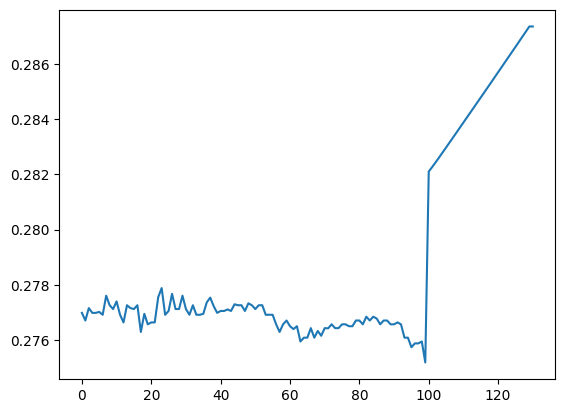

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[len(df1)-100:])

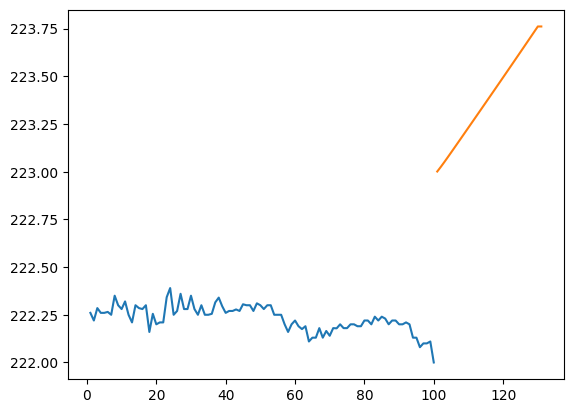

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output).reshape(-1))

In [55]:
import pickle
pickle.dump(model,open('tesla_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [56]:
# Save the model in HDF5 format
model.save('my_model.h5')
